In [2]:
import requests
import pandas as pd
import time
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [3]:
# Load NAV data
nav_df = pd.read_csv(
    "Cleaned_Master_NAV.csv",
    parse_dates=["Date"],     
    dayfirst=False            
)

# Sort by date and set index
nav_df = nav_df.sort_values("Date").set_index("Date")

# Preview first few rows
print("NAV dataframe (head):")
display(nav_df.head())

# Basic shape
print(f"\nShape: {nav_df.shape[0]} rows × {nav_df.shape[1]} funds")

# Identify the start date of each fund (first non-NaN)
fund_start_dates = nav_df.apply(lambda col: col.first_valid_index())
print("\nFund inception dates:")
display(fund_start_dates)

NAV dataframe (head):


,Franklin India Corporate Debt Fund - Direct - GROWTH,Nippon India Corporate Bond Fund - Direct Plan Growth Plan - Growth Option,Sundaram Corporate Bond Fund Direct Plan - Growth,Aditya Birla Sun Life Corporate Bond Fund - Growth - Direct Plan,Invesco India Corporate Bond Fund - Direct Plan - Growth,ICICI Prudential Corporate Bond Fund - Direct Plan - Growth,HDFC Corporate Bond Fund - Growth Option - Direct Plan,CANARA ROBECO CORPORATE BOND FUND - DIRECT PLAN - GROWTH OPTION,Kotak Corporate Bond Fund- Direct Plan- Growth Option,BANDHAN Corporate Bond Fund - Direct Growth,...,Axis Corporate Bond Fund - Direct Plan Growth,Union Corporate Bond Fund - Direct Plan - Growth Option,UTI Corporate Bond Fund - Direct Plan - Growth Option,DSP Corporate Bond Fund - Direct - Growth,SBI Corporate Bond Fund - Direct Plan - Growth,Mirae Asset Corporate Bond Fund Direct Growth Plan,Tata Corporate Bond Fund-Direct Plan-Growth,BARODA BNP PARIBAS Corporate Bond Fund - Direct Plan - Growth Option,HSBC Corporate Bond Fund - Direct Growth,TRUSTMF CORPORATE BOND FUND-DIRECT PLAN-GROWTH
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,38.9157,NaN,NaN,NaN,NaN,NaN,12.4504,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,38.9381,23.8807,NaN,42.5243,1378.21,NaN,12.4584,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,38.9939,23.8867,NaN,42.5392,1380.41,11.6079,12.4678,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,39.0279,23.8925,NaN,42.5567,1382.48,11.6112,12.4786,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,39.0827,23.9094,NaN,42.6007,1385.80,11.6197,12.4843,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Shape: 3124 rows × 21 funds

Fund inception dates:


Franklin India Corporate Debt Fund - Direct - GROWTH                         2013-01-01
Nippon India Corporate Bond Fund - Direct Plan Growth Plan - Growth Option   2013-01-02
Sundaram Corporate Bond Fund Direct Plan - Growth                            2013-05-13
Aditya Birla Sun Life Corporate Bond Fund - Growth - Direct Plan             2013-01-02
Invesco India Corporate Bond Fund - Direct Plan - Growth                     2013-01-02
ICICI Prudential Corporate Bond Fund - Direct Plan - Growth                  2013-01-03
HDFC Corporate Bond Fund - Growth Option - Direct Plan                       2013-01-01
CANARA ROBECO CORPORATE BOND FUND - DIRECT PLAN - GROWTH OPTION              2014-02-10
Kotak Corporate Bond Fund- Direct Plan- Growth Option                        2015-02-02
BANDHAN Corporate Bond Fund - Direct Growth                                  2016-01-13
PGIM India Corporate Bond Fund - Direct Plan - Growth                        2016-03-08
Axis Corporate Bond Fund - Direc

In [4]:
# Compute Daily Simple Returns
returns_df = nav_df.pct_change()  

# Preview results
print("\nDaily Returns (head):")
display(returns_df.head())

# Drop the first row (it will be NaN due to pct_change)
returns_df = returns_df.iloc[1:]

print("\nReturns df shape:", returns_df.shape)


Daily Returns (head):


,Franklin India Corporate Debt Fund - Direct - GROWTH,Nippon India Corporate Bond Fund - Direct Plan Growth Plan - Growth Option,Sundaram Corporate Bond Fund Direct Plan - Growth,Aditya Birla Sun Life Corporate Bond Fund - Growth - Direct Plan,Invesco India Corporate Bond Fund - Direct Plan - Growth,ICICI Prudential Corporate Bond Fund - Direct Plan - Growth,HDFC Corporate Bond Fund - Growth Option - Direct Plan,CANARA ROBECO CORPORATE BOND FUND - DIRECT PLAN - GROWTH OPTION,Kotak Corporate Bond Fund- Direct Plan- Growth Option,BANDHAN Corporate Bond Fund - Direct Growth,...,Axis Corporate Bond Fund - Direct Plan Growth,Union Corporate Bond Fund - Direct Plan - Growth Option,UTI Corporate Bond Fund - Direct Plan - Growth Option,DSP Corporate Bond Fund - Direct - Growth,SBI Corporate Bond Fund - Direct Plan - Growth,Mirae Asset Corporate Bond Fund Direct Growth Plan,Tata Corporate Bond Fund-Direct Plan-Growth,BARODA BNP PARIBAS Corporate Bond Fund - Direct Plan - Growth Option,HSBC Corporate Bond Fund - Direct Growth,TRUSTMF CORPORATE BOND FUND-DIRECT PLAN-GROWTH
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.000576,NaN,NaN,NaN,NaN,NaN,0.000643,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.001433,0.000251,NaN,0.000350,0.001596,NaN,0.000755,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,0.000872,0.000243,NaN,0.000411,0.001500,0.000284,0.000866,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,0.001404,0.000707,NaN,0.001034,0.002401,0.000732,0.000457,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Returns df shape: (3123, 21)


In [5]:
# helper functions
def annualized_return(nav_series):
    """Calculate annualized return using first and last NAV."""
    nav_series = nav_series.dropna()
    if len(nav_series) < 2:
        return np.nan
    total_return = nav_series.iloc[-1] / nav_series.iloc[0] - 1
    years = (nav_series.index[-1] - nav_series.index[0]).days / 365
    return (1 + total_return) ** (1 / years) - 1 if years > 0 else np.nan


def annualized_volatility(returns):
    """Daily volatility scaled to annual."""
    return returns.std() * np.sqrt(252)


def max_drawdown(nav_series):
    """Maximum drawdown using cumulative max."""
    nav_series = nav_series.dropna()
    running_max = nav_series.cummax()
    dd = (nav_series - running_max) / running_max
    return dd.min() 

def downside_deviation(returns):
    """Standard deviation of only negative returns."""
    negative = returns[returns < 0]
    return negative.std() * np.sqrt(252)


def worst_5pct_return(returns):
    """5th percentile of daily returns (tail risk)."""
    return np.nanpercentile(returns.dropna(), 5)


def rolling_volatility_stats(returns, window=252):
    """Mean and SD of rolling 1-year volatility."""
    rolling_vol = returns.rolling(window).std() * np.sqrt(252)
    return rolling_vol.mean(), rolling_vol.std()


# Compute all features for each fund 
behavioural_features = {}

for fund in returns_df.columns:

    nav_series = nav_df[fund]
    ret_series = returns_df[fund]

    behavioural_features[fund] = {
        "annualized_return": annualized_return(nav_series),
        "annualized_volatility": annualized_volatility(ret_series),
        "max_drawdown": max_drawdown(nav_series),
        "downside_deviation": downside_deviation(ret_series),
        "worst_5pct_return": worst_5pct_return(ret_series),
    }

    # Rolling vol stats
    rv_mean, rv_std = rolling_volatility_stats(ret_series)
    behavioural_features[fund]["rolling_vol_mean"] = rv_mean
    behavioural_features[fund]["rolling_vol_std"]  = rv_std

    # Return stability = inverse of volatility * rolling vol std
    behaviour_stability = 1 / (behavioural_features[fund]["annualized_volatility"] * rv_std 
                               if rv_std and behavioural_features[fund]["annualized_volatility"] else np.nan)
    behavioural_features[fund]["return_stability"] = behaviour_stability


# Convert dictionary to DataFrame
behaviour_df = pd.DataFrame(behavioural_features).T

print("Behavioural Feature DataFrame:")
display(behaviour_df)

print("\nShape:", behaviour_df.shape)

Behavioural Feature DataFrame:


,annualized_return,annualized_volatility,max_drawdown,downside_deviation,worst_5pct_return,rolling_vol_mean,rolling_vol_std,return_stability
Franklin India Corporate Debt Fund - Direct - GROWTH,0.084702,0.023369,-0.073602,0.026949,-0.001039,0.016939,0.012654,3381.776818
Nippon India Corporate Bond Fund - Direct Plan Growth Plan - Growth Option,0.080454,0.010804,-0.016976,0.014037,-0.000412,0.009496,0.004725,19587.863027
Sundaram Corporate Bond Fund Direct Plan - Growth,0.076127,0.029769,-0.110195,0.034248,-0.001568,0.019123,0.012857,2612.842756
Aditya Birla Sun Life Corporate Bond Fund - Growth - Direct Plan,0.082232,0.013523,-0.023775,0.014034,-0.000637,0.011960,0.005868,12602.584006
Invesco India Corporate Bond Fund - Direct Plan - Growth,0.074983,0.024838,-0.046890,0.023442,-0.001721,0.021643,0.012144,3315.203180
ICICI Prudential Corporate Bond Fund - Direct Plan - Growth,0.082293,0.011697,-0.020075,0.012438,-0.000467,0.010387,0.005472,15624.826306
HDFC Corporate Bond Fund - Growth Option - Direct Plan,0.081318,0.017736,-0.040034,0.020248,-0.000905,0.014646,0.008849,6371.486155
CANARA ROBECO CORPORATE BOND FUND - DIRECT PLAN - GROWTH OPTION,0.076109,0.013085,-0.020124,0.011609,-0.000723,0.012153,0.005108,14962.811267
Kotak Corporate Bond Fund- Direct Plan- Growth Option,0.077283,0.013900,-0.019217,0.015919,-0.000475,0.011598,0.008247,8723.509683
BANDHAN Corporate Bond Fund - Direct Growth,0.074412,0.017164,-0.034685,0.016074,-0.000786,0.013956,0.010671,5459.719644



Shape: (21, 8)


In [6]:
features_df = pd.read_csv('fund_features.csv')

features_df.columns = (
    features_df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(".", "", regex=False)
    .str.replace("%", "")
)

numeric_cols = ['Yield_to_Maturity', 'Avg_Maturity_Yrs', 'Expense_Ratio', 'Net_Assets_Cr']

for col in numeric_cols:
    features_df[col] = pd.to_numeric(features_df[col], errors='coerce')

# Adjusted Yield after expense ratio
features_df["adjusted_yield"] = features_df["Yield_to_Maturity"] - features_df["Expense_Ratio"]


# Log AUM (for normalization)
features_df["log_aum"] = np.log(features_df["Net_Assets_Cr"] + 1)

# Yield-to-duration ratio (risk-adjusted yield proxy)
features_df["yield_duration_ratio"] = (
    features_df["Yield_to_Maturity"] / features_df["Avg_Maturity_Yrs"]
)

# Expense efficiency: lower expense → higher score
features_df["expense_efficiency"] = 1 / features_df["Expense_Ratio"]

# Align fund names: set index to Funds for merging
structural_df = features_df.set_index("Funds")

# Ensure same order/index format as behaviour_df
structural_df.index = structural_df.index.str.strip()
behaviour_df.index = behaviour_df.index.str.strip()

# Merge
master_df = structural_df.join(behaviour_df, how="inner")

print("\nMASTER FEATURE MATRIX (structural + behavioural):")
print(master_df.head())

print("\nShape:", master_df.shape)

master_df.to_csv('structural_features.csv')


MASTER FEATURE MATRIX (structural + behavioural):
                                                    Scheme_Code  \
Aditya Birla Sun Life Corporate Bond Fund - Gro...       119533   
Axis Corporate Bond Fund - Direct Plan Growth            141588   
BANDHAN Corporate Bond Fund - Direct Growth              135916   
BARODA BNP PARIBAS Corporate Bond Fund - Direct...       150237   
CANARA ROBECO CORPORATE BOND FUND - DIRECT PLAN...       126685   

                                                    Yield_to_Maturity  \
Aditya Birla Sun Life Corporate Bond Fund - Gro...               7.01   
Axis Corporate Bond Fund - Direct Plan Growth                    6.91   
BANDHAN Corporate Bond Fund - Direct Growth                      6.72   
BARODA BNP PARIBAS Corporate Bond Fund - Direct...               6.88   
CANARA ROBECO CORPORATE BOND FUND - DIRECT PLAN...               6.74   

                                                    Avg_Maturity_Yrs  \
Aditya Birla Sun Life Corporate Bon

# Outlier Markdown

# Visualization Step

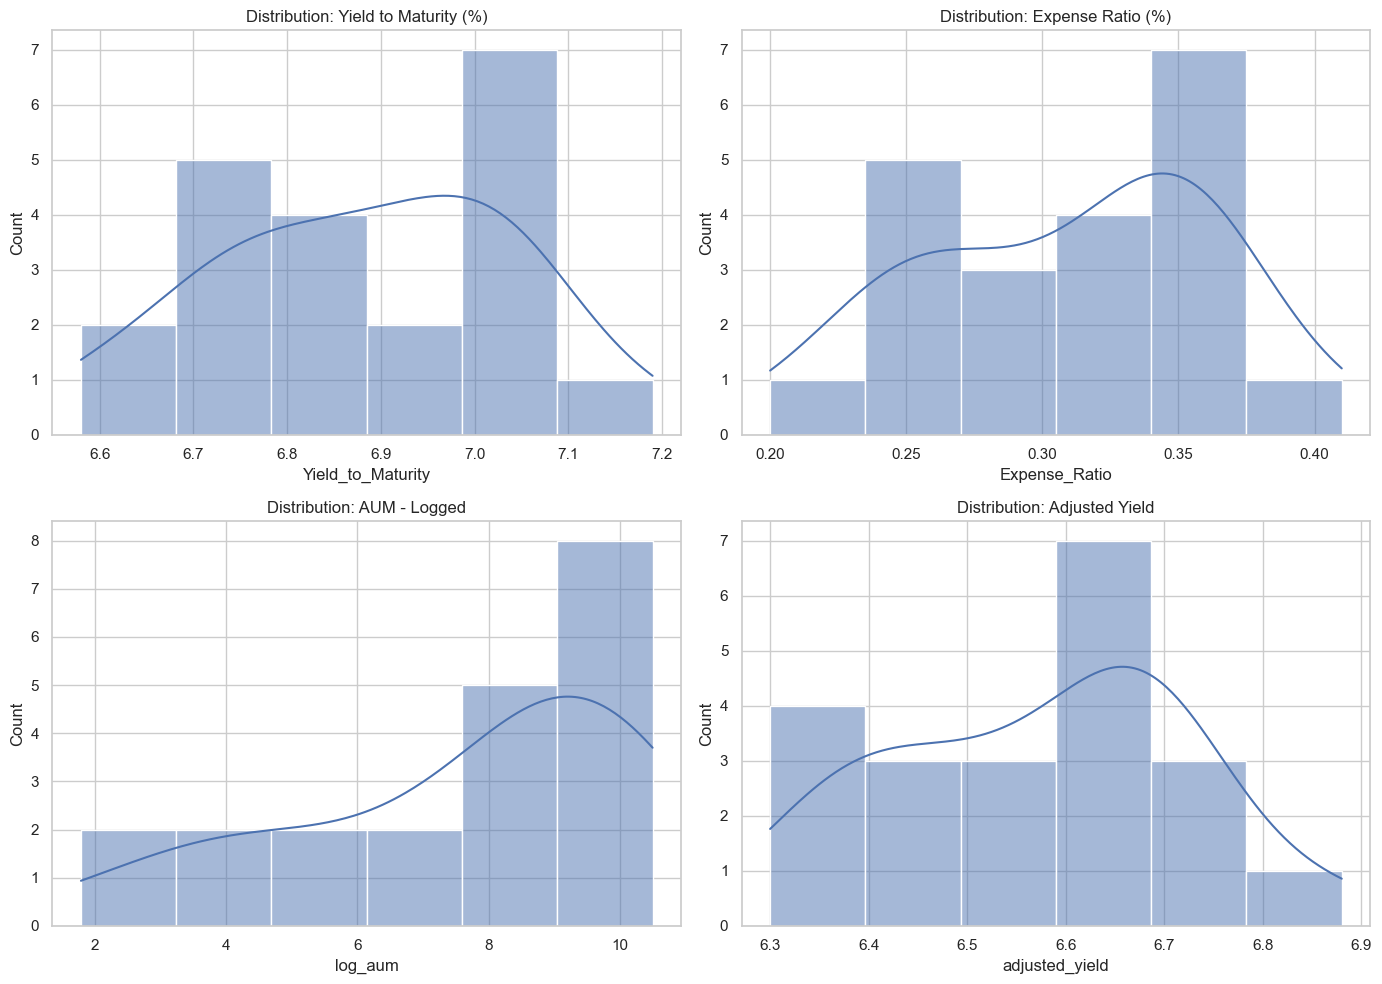

In [7]:
sns.set_theme(style="whitegrid", font_scale=1.0)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(master_df["Yield_to_Maturity"], kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribution: Yield to Maturity (%)")

sns.histplot(master_df["Expense_Ratio"], kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribution: Expense Ratio (%)")

sns.histplot(master_df["log_aum"], kde=True, ax=axes[1,0])
axes[1,0].set_title("Distribution: AUM - Logged")

sns.histplot(master_df["adjusted_yield"], kde=True, ax=axes[1,1])
axes[1,1].set_title("Distribution: Adjusted Yield")

plt.tight_layout()
plt.show()

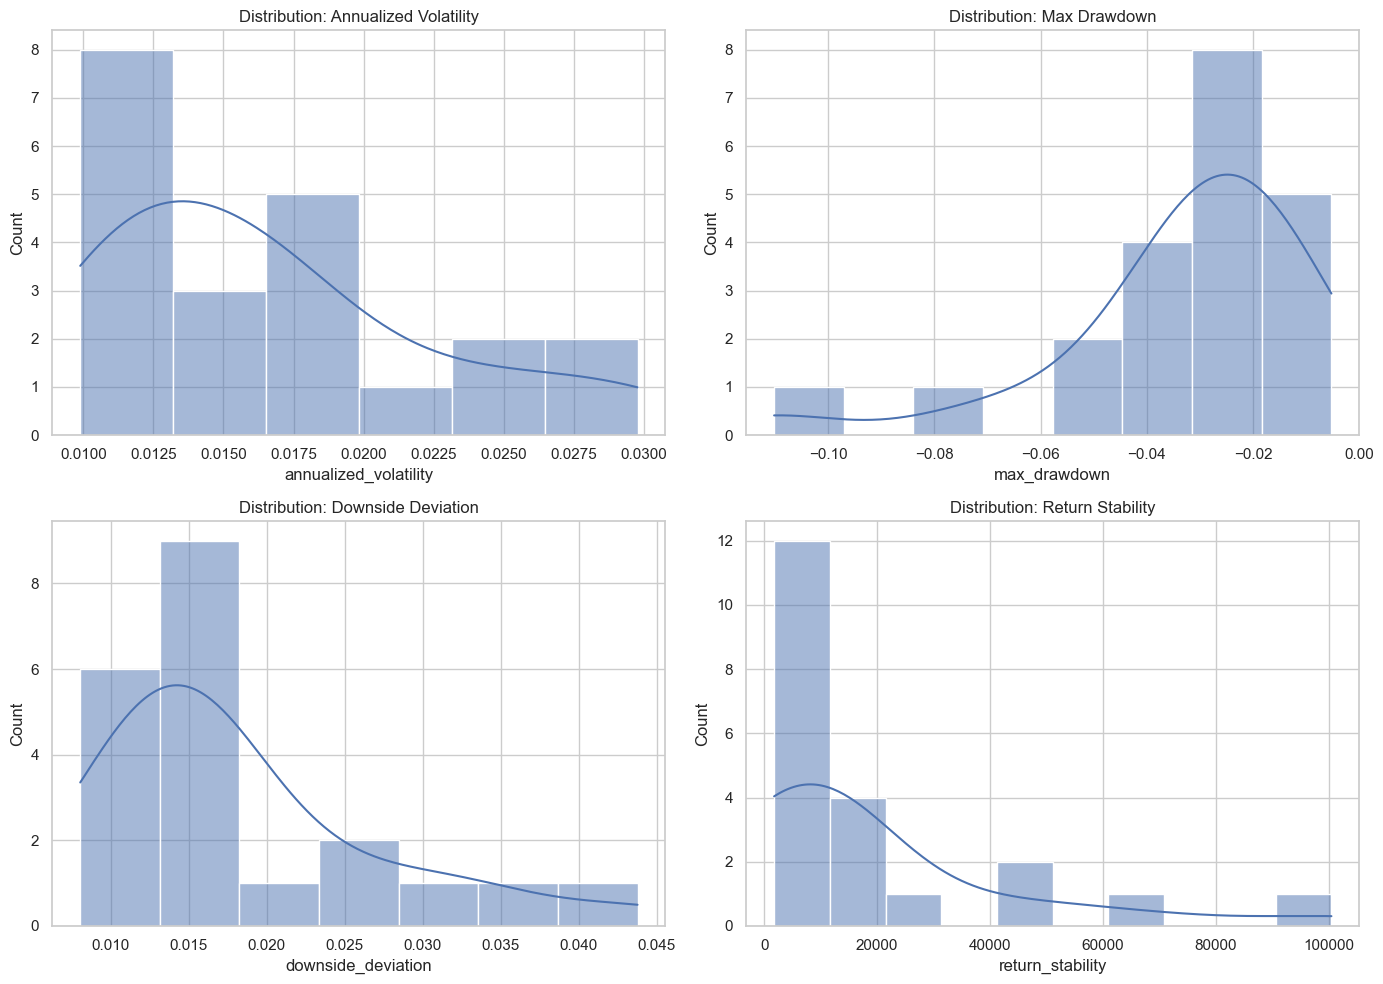

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(master_df["annualized_volatility"], kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribution: Annualized Volatility")

sns.histplot(master_df["max_drawdown"], kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribution: Max Drawdown")

sns.histplot(master_df["downside_deviation"], kde=True, ax=axes[1,0])
axes[1,0].set_title("Distribution: Downside Deviation")

sns.histplot(master_df["return_stability"], kde=True, ax=axes[1,1])
axes[1,1].set_title("Distribution: Return Stability")

plt.tight_layout()
plt.show()

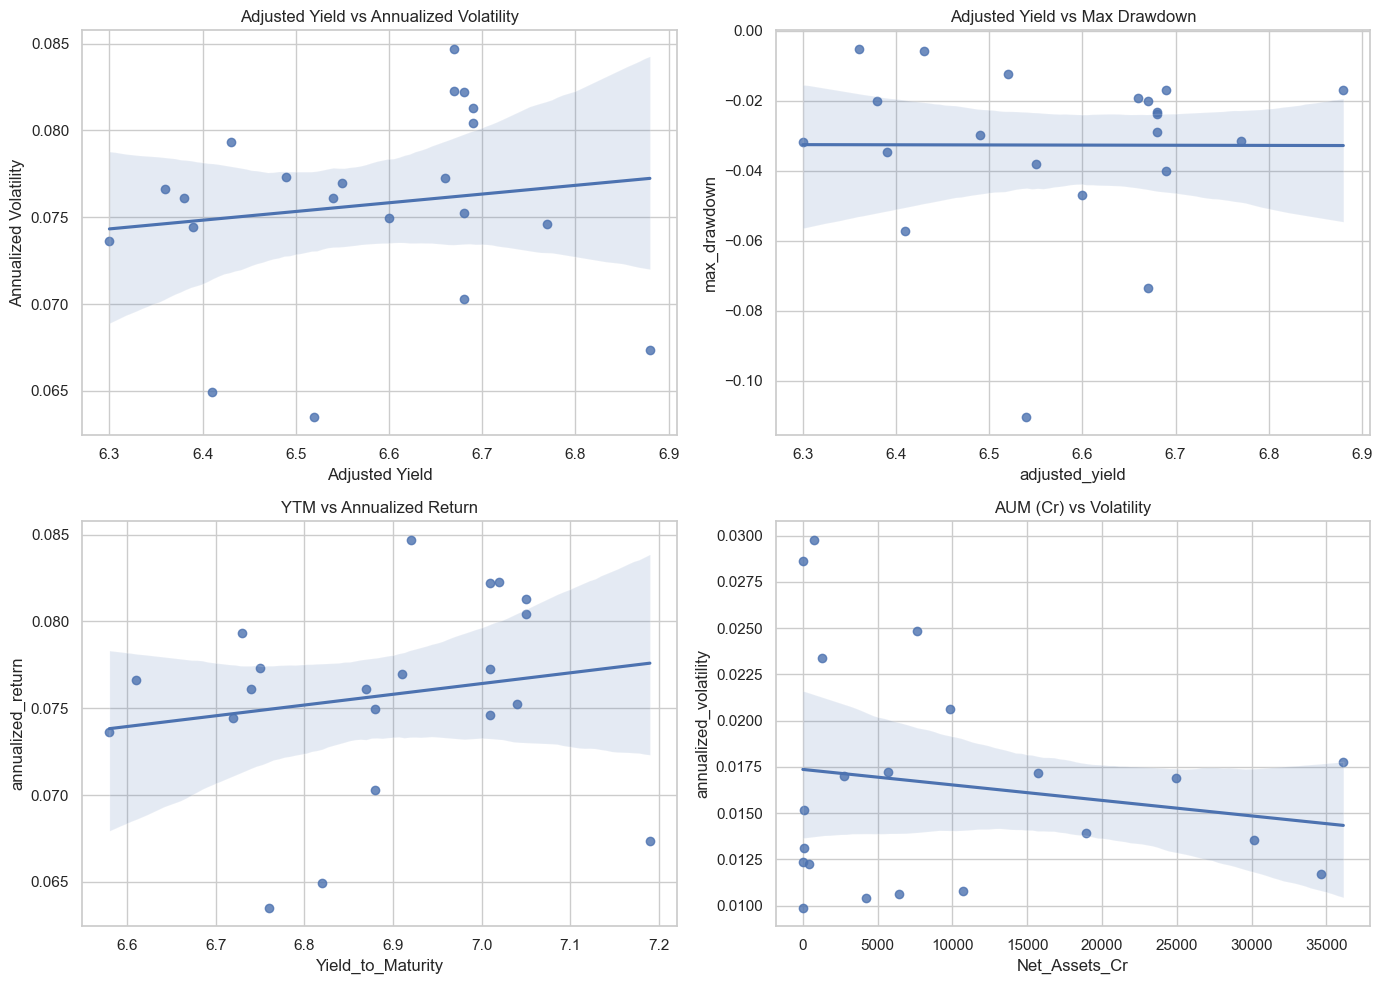

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.regplot(x=master_df["adjusted_yield"], y=master_df["annualized_return"], ax=axes[0,0])
axes[0,0].set_title("Adjusted Yield vs Annualized Volatility")
axes[0,0].set_xlabel("Adjusted Yield")
axes[0,0].set_ylabel("Annualized Volatility")

sns.regplot(x=master_df["adjusted_yield"], y=master_df["max_drawdown"], ax=axes[0,1])
axes[0,1].set_title("Adjusted Yield vs Max Drawdown")

sns.regplot(x=master_df["Yield_to_Maturity"], y=master_df["annualized_return"], ax=axes[1,0])
axes[1,0].set_title("YTM vs Annualized Return")

sns.regplot(x=master_df["Net_Assets_Cr"], y=master_df["annualized_volatility"], ax=axes[1,1])
axes[1,1].set_title("AUM (Cr) vs Volatility")

plt.tight_layout()
plt.show()

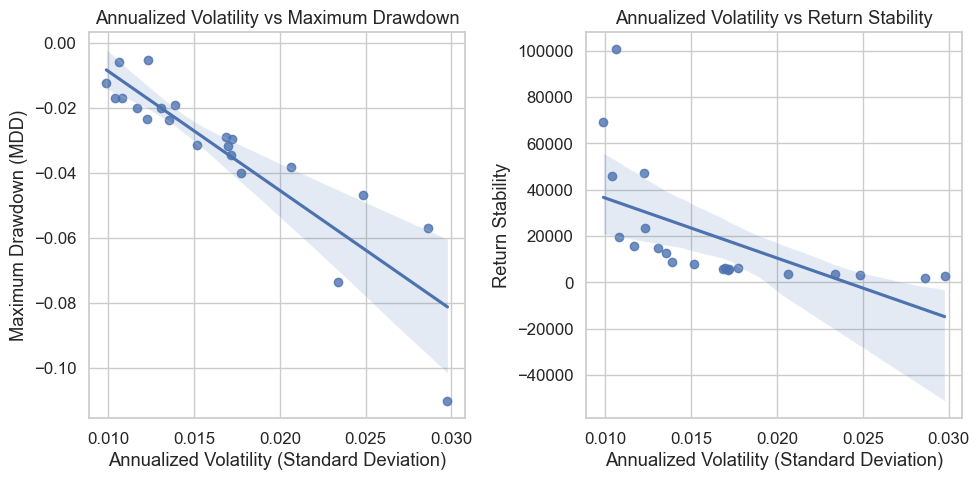

In [33]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

# Plot 1: Annualized Volatility vs Maximum Drawdown
sns.regplot(x=master_df["annualized_volatility"], y=master_df["max_drawdown"], ax=axes[0])
axes[0].set_title("Annualized Volatility vs Maximum Drawdown")
axes[0].set_xlabel("Annualized Volatility (Standard Deviation)")
axes[0].set_ylabel("Maximum Drawdown (MDD)")

# Plot 2: Annualized Volatility vs Return Stability
sns.regplot(x=master_df["annualized_volatility"], y=master_df["return_stability"], ax=axes[1])
axes[1].set_title("Annualized Volatility vs Return Stability")
axes[1].set_xlabel("Annualized Volatility (Standard Deviation)")
axes[1].set_ylabel("Return Stability") # Added Y-axis label

plt.tight_layout()
plt.show()

# VIsualization Markdown Insights

# ML BEgins HEre

In [38]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ----------------------------------------------
# Select Features (X) and Targets (y)
# ----------------------------------------------

# Drop non-numeric or identifier columns
X = master_df.drop(columns=["annualized_return", "max_drawdown", "Scheme_Code"])

# Regression targets
y_return = master_df["annualized_return"]
y_drawdown = master_df["max_drawdown"]

# Classification target (return > 7%)
master_df["good_5y_return"] = (master_df["annualized_return"] > 0.07).astype(int)
y_class = master_df["good_5y_return"]

print("Feature Matrix Shape:", X.shape)


# -----------------------------------------------------
# 1. REGRESSION MODEL: Ridge Regression for Return
# -----------------------------------------------------

ridge_model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha=1.0))
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_scores = cross_val_score(
    ridge_model, X, y_return,
    cv=kf, scoring='r2'
)

print("\nRidge Regression (annualized_return) R² scores:", ridge_scores)
print("Mean R²:", np.mean(ridge_scores))


# -----------------------------------------------------
# 2. REGRESSION MODEL: Random Forest for Drawdown
# -----------------------------------------------------

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=4,
    random_state=42
)

rf_scores = cross_val_score(
    rf_model, X, y_drawdown,
    cv=kf, scoring='neg_mean_absolute_error'
)

print("\nRandom Forest Regression (max_drawdown) MAE scores:", -rf_scores)
print("Mean MAE:", -np.mean(rf_scores))


# -----------------------------------------------------
# 3. CLASSIFICATION MODEL: Logistic Regression
# -----------------------------------------------------

log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression())
])

log_scores = cross_val_score(
    log_reg, X, y_class,
    cv=kf, scoring='accuracy'
)

print("\nLogistic Regression Classification Accuracy:", log_scores)
print("Mean Accuracy:", np.mean(log_scores))


Feature Matrix Shape: (21, 15)

Ridge Regression (annualized_return) R² scores: [-4.91021324 -3.70338487 -0.36771557  0.97250766 -2.69022027]
Mean R²: -2.1398052597805703

Random Forest Regression (max_drawdown) MAE scores: [0.01156426 0.00427984 0.01576501 0.0106233  0.01611057]
Mean MAE: 0.011668595883072447

Logistic Regression Classification Accuracy: [1.   0.75 1.   0.5  1.  ]
Mean Accuracy: 0.85


In [40]:
master_df

,Scheme_Code,Yield_to_Maturity,Avg_Maturity_Yrs,Expense_Ratio,Net_Assets_Cr,adjusted_yield,log_aum,yield_duration_ratio,expense_efficiency,annualized_return,annualized_volatility,max_drawdown,downside_deviation,worst_5pct_return,rolling_vol_mean,rolling_vol_std,return_stability,good_5y_return
Aditya Birla Sun Life Corporate Bond Fund - Growth - Direct Plan,119533,7.01,7.23,0.33,30131,6.68,10.313343,0.969571,3.030303,0.082232,0.013523,-0.023775,0.014034,-0.000637,0.011960,0.005868,12602.584006,1
Axis Corporate Bond Fund - Direct Plan Growth,141588,6.91,4.25,0.36,9872,6.55,9.197559,1.625882,2.777778,0.076955,0.020641,-0.038143,0.031308,-0.000563,0.016653,0.014098,3436.334898,1
BANDHAN Corporate Bond Fund - Direct Growth,135916,6.72,4.16,0.33,15705,6.39,9.661798,1.615385,3.030303,0.074412,0.017164,-0.034685,0.016074,-0.000786,0.013956,0.010671,5459.719644,1
BARODA BNP PARIBAS Corporate Bond Fund - Direct Plan - Growth Option,150237,6.88,4.60,0.20,437,6.68,6.082219,1.495652,5.000000,0.070306,0.012237,-0.023345,0.015546,-0.000617,0.009667,0.001736,47069.991527,1
CANARA ROBECO CORPORATE BOND FUND - DIRECT PLAN - GROWTH OPTION,126685,6.74,4.33,0.36,113,6.38,4.736198,1.556582,2.777778,0.076109,0.013085,-0.020124,0.011609,-0.000723,0.012153,0.005108,14962.811267,1
DSP Corporate Bond Fund - Direct - Growth,144646,6.58,1.47,0.28,2724,6.30,7.910224,4.476190,3.571429,0.073604,0.016987,-0.031768,0.018155,-0.000709,0.014696,0.009513,6188.505613,1
Franklin India Corporate Debt Fund - Direct - GROWTH,118569,6.92,4.18,0.25,1290,6.67,7.163172,1.655502,4.000000,0.084702,0.023369,-0.073602,0.026949,-0.001039,0.016939,0.012654,3381.776818,1
HDFC Corporate Bond Fund - Growth Option - Direct Plan,118987,7.05,6.90,0.36,36134,6.69,10.495017,1.021739,2.777778,0.081318,0.017736,-0.040034,0.020248,-0.000905,0.014646,0.008849,6371.486155,1
HSBC Corporate Bond Fund - Direct Growth,150996,6.73,2.92,0.30,6401,6.43,8.764366,2.304795,3.333333,0.079323,0.010629,-0.005842,0.008035,-0.000690,0.010174,0.000936,100498.933767,1
ICICI Prudential Corporate Bond Fund - Direct Plan - Growth,120692,7.02,5.52,0.35,34630,6.67,10.452505,1.271739,2.857143,0.082293,0.011697,-0.020075,0.012438,-0.000467,0.010387,0.005472,15624.826306,1


/var/folders/vc/6mqvb_cd2rb2ttbbynp6k9s80000gn/T/ipykernel_37112/3721853542.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df, x="importance", y="feature", palette="viridis")


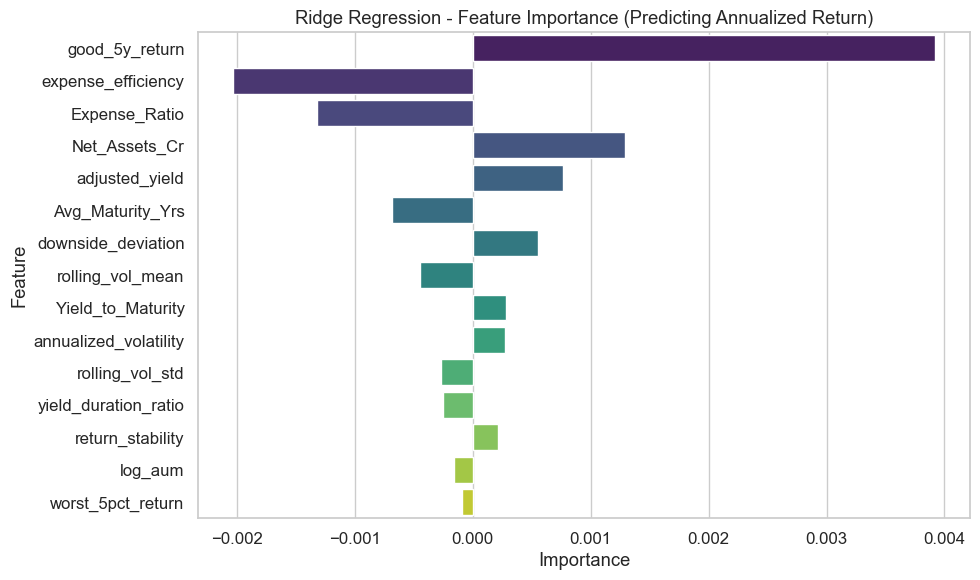

/var/folders/vc/6mqvb_cd2rb2ttbbynp6k9s80000gn/T/ipykernel_37112/3721853542.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df, x="importance", y="feature", palette="viridis")


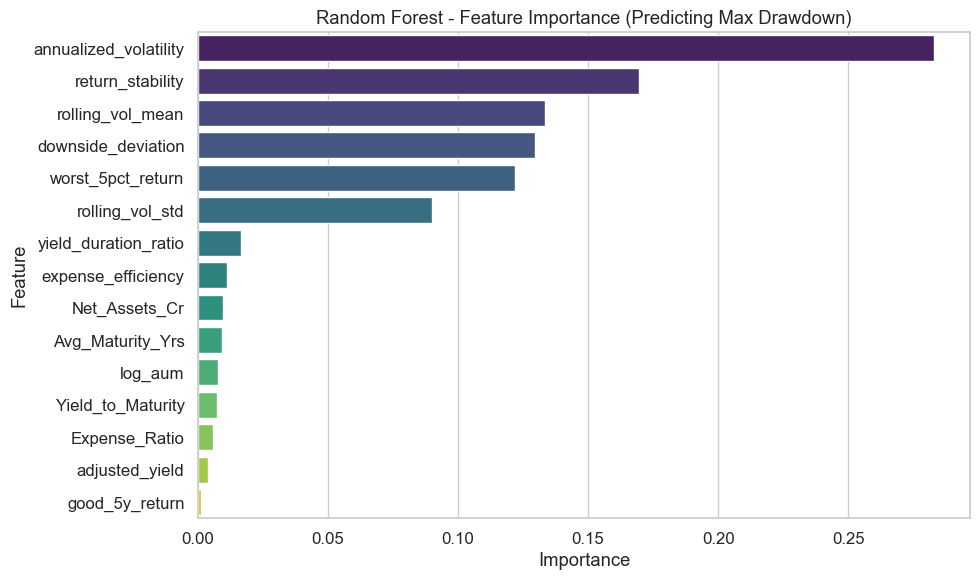

/var/folders/vc/6mqvb_cd2rb2ttbbynp6k9s80000gn/T/ipykernel_37112/3721853542.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df, x="importance", y="feature", palette="viridis")


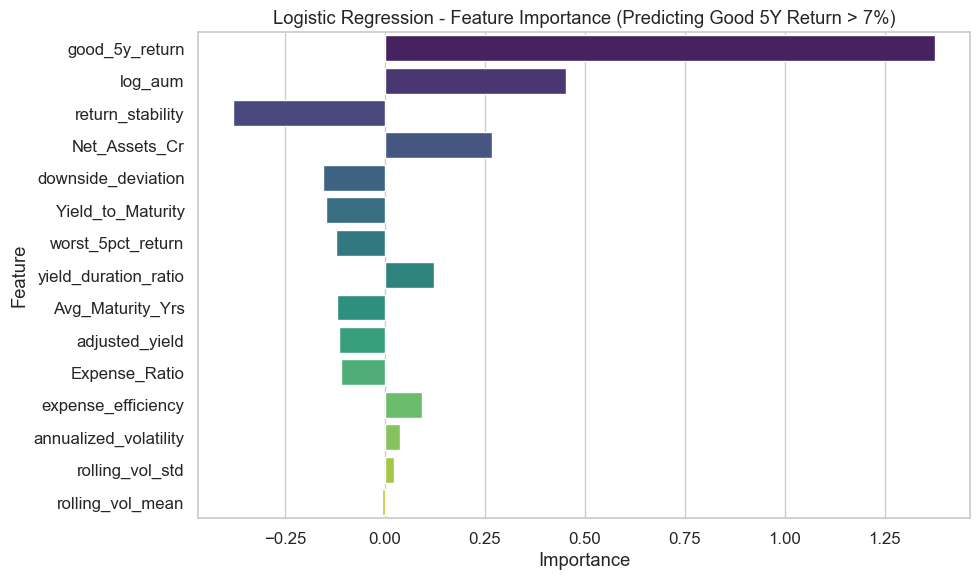

In [39]:
# --------------------------------------------------------------------
# STEP 6B: Feature Importance Extraction & Visualization
# --------------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression


# ---------------------------------------------
# Helper function: Plot sorted bar charts
# ---------------------------------------------

def plot_feature_importance(importances, feature_names, title):
    imp_df = pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    }).sort_values("importance", key=abs, ascending=False)  # sort by magnitude
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=imp_df, x="importance", y="feature", palette="viridis")
    plt.title(title)
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()


# ---------------------------------------------
# 1. Ridge Regression Feature Importance
# ---------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ridge_full = Ridge(alpha=1.0)
ridge_full.fit(X_scaled, y_return)

ridge_importances = ridge_full.coef_

plot_feature_importance(
    ridge_importances,
    X.columns,
    "Ridge Regression - Feature Importance (Predicting Annualized Return)"
)


# ---------------------------------------------
# 2. Random Forest Feature Importance (Drawdown)
# ---------------------------------------------

rf_full = RandomForestRegressor(
    n_estimators=300, max_depth=4, random_state=42
)
rf_full.fit(X, y_drawdown)

rf_importances = rf_full.feature_importances_

plot_feature_importance(
    rf_importances,
    X.columns,
    "Random Forest - Feature Importance (Predicting Max Drawdown)"
)


# ---------------------------------------------
# 3. Logistic Regression (Classification)
# ---------------------------------------------

log_full = LogisticRegression(max_iter=500)
log_full.fit(X_scaled, y_class)

log_importances = log_full.coef_[0]

plot_feature_importance(
    log_importances,
    X.columns,
    "Logistic Regression - Feature Importance (Predicting Good 5Y Return > 7%)"
)
